# Text Mining

## Overview

Text mining is the application of the techniques we discussed so far to textual data with the goal to infer information from the data. Examples for text mining applications are the analysis of customer reviews to infer their sentiment or the automated grouping of related documents. The problem with analyzing natural language text is that sentences or longer texts are neither numeric nor categorical data. Moreover, there is often some inherent structure in texts, e.g., headlines, introductions, references to other related content, or summaries. When we read text, we automatically identify these internal structures that textual data has. This is one of the biggest challenges of text mining: finding a good representation of the text such that it can be used for machine learning. 

For this, the text has to be somehow *encoded* into numeric or categorical data with as little loss of information as possible. The ideal encoding captures not only the words, but also the meaning of the words in their *context*, the grammatical structure, as well as the broader context of the text, e.g., of sentences within a document. To achieve this is still a subject of ongoing research. However, there were many advancements in recent years that made text mining into a powerful, versatile, and often sufficiently reliable tool. Since text mining itself is a huge field, we can only scratch the surface of the topic. The goal is that upon finishing this chapter, you have a good idea the challenges of text mining, know basic text processing techniques, and also have a general idea of how more advanced text mining works.

We will use the following eight tweets from Donald Trump as an example for textual data to demonstrate how text mining works in general. All data processing steps are done with the goal to prepare the text such that it is possible to analyze the topic of the tweets. 

In [4]:
from textwrap import TextWrapper

tweets_list = ['Oct 4, 2018 08:03:25 PM Beautiful evening in Rochester, Minnesota. VOTE, VOTE, VOTE! https://t.co/SyxrxvTpZE [Twitter for iPhone]',
               'Oct 4, 2018 07:52:20 PM Thank you Minnesota - I love you! https://t.co/eQC2NqdIil [Twitter for iPhone]',
               'Oct 4, 2018 05:58:21 PM Just made my second stop in Minnesota for a MAKE AMERICA GREAT AGAIN rally. We need to elect @KarinHousley to the U.S. Senate, and we need the strong leadership of @TomEmmer, @Jason2CD, @JimHagedornMN and @PeteStauber in the U.S. House! [Twitter for iPhone]',
               'Oct 4, 2018 05:17:48 PM Congressman Bishop is doing a GREAT job! He helped pass tax reform which lowered taxes for EVERYONE! Nancy Pelosi is spending hundreds of thousands of dollars on his opponent because they both support a liberal agenda of higher taxes and wasteful spending! [Twitter for iPhone]',
               'Oct 4, 2018 02:29:27 PM "U.S. Stocks Widen Global Lead" https://t.co/Snhv08ulcO [Twitter for iPhone]',
               'Oct 4, 2018 02:17:28 PM Statement on National Strategy for Counterterrorism: https://t.co/ajFBg9Elsj https://t.co/Qr56ycjMAV [Twitter for iPhone]',
               'Oct 4, 2018 12:38:08 PM Working hard, thank you! https://t.co/6HQVaEXH0I [Twitter for iPhone]',
               'Oct 4, 2018 09:17:01 AM This is now the 7th. time the FBI has investigated Judge Kavanaugh. If we made it 100, it would still not be good enough for the Obstructionist Democrats. [Twitter for iPhone]']

wrapper = TextWrapper(width=65)
for tweet in tweets_list:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

Oct 4, 2018 08:03:25 PM Beautiful evening in Rochester,
Minnesota. VOTE, VOTE, VOTE! https://t.co/SyxrxvTpZE [Twitter for
iPhone]

Oct 4, 2018 07:52:20 PM Thank you Minnesota - I love you!
https://t.co/eQC2NqdIil [Twitter for iPhone]

Oct 4, 2018 05:58:21 PM Just made my second stop in Minnesota for
a MAKE AMERICA GREAT AGAIN rally. We need to elect @KarinHousley
to the U.S. Senate, and we need the strong leadership of
@TomEmmer, @Jason2CD, @JimHagedornMN and @PeteStauber in the U.S.
House! [Twitter for iPhone]

Oct 4, 2018 05:17:48 PM Congressman Bishop is doing a GREAT job!
He helped pass tax reform which lowered taxes for EVERYONE! Nancy
Pelosi is spending hundreds of thousands of dollars on his
opponent because they both support a liberal agenda of higher
taxes and wasteful spending! [Twitter for iPhone]

Oct 4, 2018 02:29:27 PM "U.S. Stocks Widen Global Lead"
https://t.co/Snhv08ulcO [Twitter for iPhone]

Oct 4, 2018 02:17:28 PM Statement on National Strategy for
Counterterrorism: 

## Preprocessing

Through preprocessing, text is transformed into a representation that we can use for machine learning algorithms, e.g., for the classification or for the grouping with clustering. 

### Creation of  a Corpus

The first preprocessing step is to create a *corpus* of *documents*. In the sense of the terminology we have used so far, the documents are the objects that we want to reason about, the corpus is a collection of objects. In our Twitter example, the corpus is a collection of tweets, and each tweet is a document. In our case, we already have a list of tweets, which is the same as a corpus of documents. In other use cases, this can be more difficult. For example, if you crawl the internet to collect reviews for a product, it is likely that you find multiple reviews on the same Web site. In this case, you must extract the reviews into separate documents, which can be challenging.

### Relevant Content

Textual data, especially text that was automatically collected from the Internet, often contains irrelevant content for a given use case. For example, if we only want to analyze the topic of tweets, the timestamps are irrelevant. It does also not matter if a tweet was sent with an iPhone or a different application. Links are a tricky case, as they may contain relevant information, but are also often irrelevant. For example, the URL of this page contains relevant information, e.g., the author, the general topic, and the name of the current chapter. Other parts, like the http are irrelevant. Other links are completely irrelevant, e.g., in case link shorteners are used. In this case a link is just a random string. 

When we strip the irrelevant content from the tweets, we get the following.

In [6]:
import re

tweets_relevant_content = []
for tweet in tweets_list:
    # remove the first 24 chars, because they are the time stamp
    # remove everything after last [ because this is the source of the tweet
    modified_tweet = tweet[24:tweet.rfind('[')]
    # drop links
    modified_tweet = re.sub(r'http\S+', '', modified_tweet).strip()
    tweets_relevant_content.append(modified_tweet)

for tweet in tweets_relevant_content:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

Beautiful evening in Rochester, Minnesota. VOTE, VOTE, VOTE!

Thank you Minnesota - I love you!

Just made my second stop in Minnesota for a MAKE AMERICA GREAT
AGAIN rally. We need to elect @KarinHousley to the U.S. Senate,
and we need the strong leadership of @TomEmmer, @Jason2CD,
@JimHagedornMN and @PeteStauber in the U.S. House!

Congressman Bishop is doing a GREAT job! He helped pass tax
reform which lowered taxes for EVERYONE! Nancy Pelosi is spending
hundreds of thousands of dollars on his opponent because they
both support a liberal agenda of higher taxes and wasteful
spending!

"U.S. Stocks Widen Global Lead"

Statement on National Strategy for Counterterrorism:

Working hard, thank you!

This is now the 7th. time the FBI has investigated Judge
Kavanaugh. If we made it 100, it would still not be good enough
for the Obstructionist Democrats.



What is relevant and irrelevant can also depend on the context. For example, a different use case for Twitter data would be to analyze if there are differences between tweets from different sources. In this case, the source cannot be dropped, but would be needed to divide the tweets by their source. Another analysis of Twitter data may want to consider how the content of tweets evolves over time. In this case, the timestamps cannot just be dropped. Therefore, every text mining application should carefully consider what is relevant and tailor the contents of the text to the specific needs. 

### Punctuation and Cases

When we are only interested in the topic of documents, the punctuation, as well as the cases of the letters are often not useful and introduce unwanted differences between the same words. A relevant corner case of dropping punctuation and cases are acronyms. The acronym `U.S.` from the tweets is a perfect example for this, because this becomes `us`, which has a completely different meaning. If you are aware that the may be such problems within your data, you can manually address them, e.g., by mapping and `US` to `usa` after dropping the punctuation, but before lower casing the string. 

When we apply this processing to our tweets, we get the following. 

In [7]:
import string
tweets_lowercase = []

for tweet in tweets_relevant_content:
    modified_tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    modified_tweet = modified_tweet.replace('US', 'usa')
    modified_tweet = modified_tweet.lower()
    tweets_lowercase.append(modified_tweet)
    
for tweet in tweets_lowercase:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beautiful evening in rochester minnesota vote vote vote

thank you minnesota  i love you

just made my second stop in minnesota for a make america great
again rally we need to elect karinhousley to the usa senate and
we need the strong leadership of tomemmer jason2cd jimhagedornmn
and petestauber in the usa house

congressman bishop is doing a great job he helped pass tax reform
which lowered taxes for everyone nancy pelosi is spending
hundreds of thousands of dollars on his opponent because they
both support a liberal agenda of higher taxes and wasteful
spending

usa stocks widen global lead

statement on national strategy for counterterrorism

working hard thank you

this is now the 7th time the fbi has investigated judge kavanaugh
if we made it 100 it would still not be good enough for the
obstructionist democrats



### Stop Words


Another aspect of text is that not every word carries relevant meaning. Many words are required for correct grammar, but do not modify the meaning. Examples for such words are `the`, `a`, and `to`. Moreover, such words occur in almost any sentence. Other examples for frequently occuring words are `I`, `we`, `is` and `too`. For many text mining approaches, such words are not well suited, because they cannot be used to differentiate between documents. For example, these words are usually not important to specify the topic or sentiment of a document. Thus, a common preprocessing step is to remove such words. While it is possible to remove stop words with a manually defined list, there are also lists of such words that can be used.

When we apply a list of English stop words to the tweets, we get the following. 

In [8]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

tweets_no_stopwords = []
for tweet in tweets_lowercase:
    tweet_tokens = word_tokenize(tweet) 
    modified_tweet = ' '.join([w for w in tweet_tokens if not w in stop_words])
    tweets_no_stopwords.append(modified_tweet)
    
for tweet in tweets_no_stopwords:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beautiful evening rochester minnesota vote vote vote

thank minnesota love

made second stop minnesota make america great rally need elect
karinhousley usa senate need strong leadership tomemmer jason2cd
jimhagedornmn petestauber usa house

congressman bishop great job helped pass tax reform lowered taxes
everyone nancy pelosi spending hundreds thousands dollars
opponent support liberal agenda higher taxes wasteful spending

usa stocks widen global lead

statement national strategy counterterrorism

working hard thank

7th time fbi investigated judge kavanaugh made 100 would still
good enough obstructionist democrats



### Stemming and Lemmatization

Words have different spellings, depending on their grammatical context, e.g., whether something is used in the singular or the plural. Moreover, sometimes there are related verbs, adjectives, and nouns. There are also synonyms, i.e., multiple words with the same meaning. For our text mining, this means that we would observe all these different natural language terms for the same context as different words and could not easily identify that they actually mean the same. Stemming and lemmatization are a potential solution for this. 

With stemming, words are reduced to their stem. For example, the terms `spending` and `spends` are reduced to their *stem*, which is `spend`. Stemming usually works with an algorithmic approach, e.g., using [Porter's stemming algorithm](https://doi.org/10.1108/eb046814) and is limited to shorting words to their stem. Other aspects, e.g., the harmonization of `good` and `well` cannot be done with stemming. 

Lemmatization is an approach for the harmonization of words based on word lists. The wordlists contain definitions for which terms can be used synonymously. Through lemmatization, one representative of this wordlist is chosen that replaces all other words with the same meaning. This way, `good` can be used to replace all usages of `well` to harmonize the language.

When we want to apply these techniques, we should first apply the lemmatization, then the stemming. The reason for this is that the word stems created by stemming may not be part of the lemmatization dictionary. Therefore, we would reduce the power of the lemmatization, if we first stem the words. 

When we apply these techniques to our tweets, we get the following. First, we lemmatize the tweets. 

In [9]:
# The following two lines must be run once in each environment
# This downloads the list from nltk for lemmatization
# import nltk
# nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# the wordnet lemmatizer does not only harmonize synonyms but also performs some stemming
lemmatizer = WordNetLemmatizer() 

tweets_lemmatization = []
for tweet in tweets_no_stopwords:
    tweet_tokens = word_tokenize(tweet) 
    modified_tweet = ' '.join([lemmatizer.lemmatize(w) for w in tweet_tokens])
    tweets_lemmatization.append(modified_tweet)
    
for tweet in tweets_lemmatization:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beautiful evening rochester minnesota vote vote vote

thank minnesota love

made second stop minnesota make america great rally need elect
karinhousley usa senate need strong leadership tomemmer jason2cd
jimhagedornmn petestauber usa house

congressman bishop great job helped pas tax reform lowered tax
everyone nancy pelosi spending hundred thousand dollar opponent
support liberal agenda higher tax wasteful spending

usa stock widen global lead

statement national strategy counterterrorism

working hard thank

7th time fbi investigated judge kavanaugh made 100 would still
good enough obstructionist democrat



We can see that some words are shortened, e.g., `stocks` became `stock`. When we apply stemming, we get the following.

In [10]:
from nltk.stem import PorterStemmer

# porter stemming is a linguistic algorithm that provides additional stemming
stemmer = PorterStemmer()

tweets_stemming = []
for tweet in tweets_lemmatization:
    tweet_tokens = word_tokenize(tweet) 
    modified_tweet = ' '.join([stemmer.stem(w) for w in tweet_tokens])
    tweets_stemming.append(modified_tweet)
    
for tweet in tweets_stemming:
    print('\n'.join(wrapper.wrap(tweet)))
    print()

beauti even rochest minnesota vote vote vote

thank minnesota love

made second stop minnesota make america great ralli need elect
karinhousley usa senat need strong leadership tomemm jason2cd
jimhagedornmn petestaub usa hous

congressman bishop great job help pa tax reform lower tax everyon
nanci pelosi spend hundr thousand dollar oppon support liber
agenda higher tax wast spend

usa stock widen global lead

statement nation strategi counterterror

work hard thank

7th time fbi investig judg kavanaugh made 100 would still good
enough obstructionist democrat



We observe that most words are now reduced to their stem and that these stems are often no real words anymore. This is a major difference between stemming and lemmatization. The results of lemmatization will always be words that can still be found in a dictionary, while stemming creates sometimes hard-to-read representations of words.

### Visualization of the Preprocessing

We can use wordclouds to demonstrate the impact of each preprocessing step. Wordclouds visualize textual data and determine the size of the displayed words through their count in the data. 

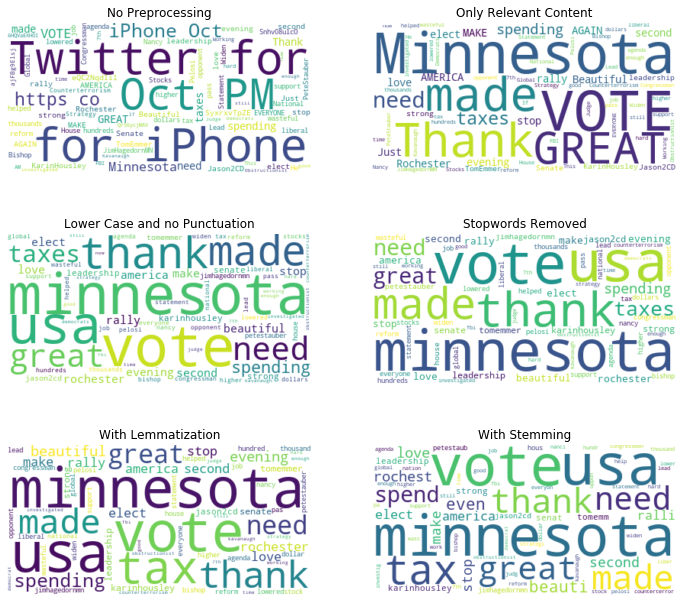

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_raw = WordCloud(background_color="white")
wc_raw.generate(' '.join(tweets_list))

wc_relevant = WordCloud(background_color="white")
wc_relevant.generate(' '.join(tweets_relevant_content))

wc_lowercase = WordCloud(background_color="white")
wc_lowercase.generate(' '.join(tweets_lowercase))

wc_stopwords = WordCloud(background_color="white")
wc_stopwords.generate(' '.join(tweets_no_stopwords))

wc_lemma = WordCloud(background_color="white")
wc_lemma.generate(' '.join(tweets_lemmatization))

wc_stemming = WordCloud(background_color="white")
wc_stemming.generate(' '.join(tweets_stemming))



fig, axes = plt.subplots(3, 2, figsize=(12, 11))
axes[0, 0].axis("off")
axes[0, 0].imshow(wc_raw, interpolation="bilinear")
axes[0, 0].set_title('No Preprocessing')

axes[0, 1].axis("off")
axes[0, 1].imshow(wc_relevant, interpolation="bilinear")
axes[0, 1].set_title('Only Relevant Content')

axes[1, 0].axis("off")
axes[1, 0].imshow(wc_lowercase, interpolation="bilinear")
axes[1, 0].set_title('Lower Case and no Punctuation')

axes[1, 1].axis("off")
axes[1, 1].imshow(wc_stopwords, interpolation="bilinear")
axes[1, 1].set_title('Stopwords Removed')

axes[2, 0].axis("off")
axes[2, 0].imshow(wc_lemma, interpolation="bilinear")
axes[2, 0].set_title('With Lemmatization')

axes[2, 1].axis("off")
axes[2, 1].imshow(wc_stemming, interpolation="bilinear")
axes[2, 1].set_title('With Stemming')
plt.show()

### Bag-of-Words

Once we have preprocessed the text, we can create a numeric representation in form of a *bag-of-words*. A bag of words is similar to a one-hot-encoding of the text: each unique word is a separate feature. The value of the features for a document is the count of that word within the documented. This is also called the *term frequency* (TF). This is where the harmonization of the words pays off: now similar words increase the count for the same feature and not two different features. For example, the bag of words for our tweets looks like this.

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(tweets_stemming)
bag_of_words_df = pd.DataFrame(bag_of_words.todense(), columns=vectorizer.get_feature_names())
bag_of_words_df

,100,7th,agenda,america,beauti,bishop,congressman,counterterror,democrat,dollar,...,thank,thousand,time,tomemm,usa,vote,wast,widen,work,would
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


We can use the word counts in the bag of words as input for learning algorithms. For clustering, this would mean that we group based on documents that use the same words, for classification this would mean that we compute scores and classes based on how often words occur. 

### Inverse Document Frequency

One popular addition to the bag-of-words is to use the *inverse document frequency* (IDF). The idea behind this approach is to weight words by their *uniqueness* within the corpus. If a word occurs only in few documents, it is very specific and should have a stronger influence than words that occur in many documents. The inverse document frequency is related to stop word removal. However, instead of removing words that occur in many documents, they just get a lower weight in comparison to words that occur in only few documents through the IDF, which is defined as

$$IDF_t = \log\frac{N}{D_t}$$

where $t$ is a word (term), $N$ is the number of documents in the corpus and $D_t$ is the number of documents in which $t$ appears. The TFIDF combines the term frequency with the weights of the inverse document frequency and can be used instead of the to replace the TF in the bag of words. The definition of TFIDF for a word $t$ is

$$TFIDF_t = TF_t \cdot IDF_t.$$

For our tweets, we get the following when we use the TFIDF.

In [21]:
import numpy as np

bag_of_words_df.apply(lambda col: col*np.log(len(col)/col.gt(0).sum()))

,100,7th,agenda,america,beauti,bishop,congressman,counterterror,democrat,dollar,...,thank,thousand,time,tomemm,usa,vote,wast,widen,work,would
0,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.238325,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.079442,2.772589,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,2.079442,0.000000,0.000000,2.079442,2.079442,0.000000,0.000000,2.079442,...,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.000000,0.000000,2.079442,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000
7,2.079442,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,0.000000,...,0.000000,0.000000,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442


> **Note:**
> 
> The inverse document frequency is often defined using a smoothing factors, e.g., as $IDF_t = \log\frac{N}{D_t+1}$ to avoid potentially undefined values in case a word does not appear in a corpus. Please note that there are different variants of smoothing. However, the impact on the results of the different variants of smoothing is usually very small, except that the computations have a better numerical stability. 

### Beyond the Bag-of-Words

While the bag-of-words is a good technique that scales well, there are also some severe limitations. One such limitations are that the bag-of-words does not account for the structure of documents, i.e., grammar and the context are completely ignored. Another one is that the similarity between words is ignored. For example, it makes sense that `dollar` and `euro` are two separate terms in the bag-of-words. However, the words are similar to each other, because both are currencies, which may be relevant for the text mining. 

There are also more complex techniques that can be used. A simple extension of the bag-of-words that accounts at least to some degree for the context and structure is to use $n$-grams instead of words. A $n$-gram consists of subsequences of $n$ words. Thus, we do not count how often words occur anymore, but rather how often sequences of words occur. The drawbacks of $n$-grams is that the chance that it is unlikely that $n$-grams for larger values of $n$ occur more than once, because this would require the exact same wording. Thus, $n$-grams may be needlessly specific and, therefore, hinder generalization. Moreover, the number of $n$-grams growths exponentially with $n$. Thus, this approach only works to capture the direct context of a word. 

A recent approach is to use *word embeddings* instead of the bag-of-words. Word embeddings transform words into a high dimensional space (e.g., the $\mathbb{R}^d$) such that similar words are close to each other in the embedded space. State-of-the-art word embeddings like BERT can also take the context of words into account and, thereby, further improve the similarity. The word embeddings themselves are learned through deep neural networks with a *transformer* architecture using huge amounts of textual data. 

## Challenges

The difficulties with text mining do not stop, just because we now have a numeric representation of the text that we can use as input for algorithms. There are many other problems, many of them not yet solved, that make text mining into such a hard problem. 

### Dimensionality

The first problem is the dimensionality. In our example of just eight tweets, we already have 70 different terms after preprocessing. In longer text, there are several thousand unique terms, even after preprocessing. Thus, there is a huge number of categorical features. However, not only the number of features may be very large, the number of documents can also be very large. For example, there are already over 50,000 tweets by Donald Trump (June 2020), and hundreds of millions of tweets every day. 

The combination of many features and many instances means that text mining can consume huge amounts of runtime. Therefore, large text mining applications only work with efficiently implemented algorithms, often on dedicated hardware that allows for massive parallelization. These requirements are also the reason why an algorithm that scales well with large amounts of data, like Multinomial Naive Bayes, is still a popular choice for text mining. 

### Ambiguities

The second problem is that natural language if often ambiguous. Partially, this cannot be solved, because natural language is, unless used with great care, imprecise and the exact meaning is often only understandable from a very broad context. For example, the following sentence can have a different meaning, that can only be understood from the context.

- I hit a man with a stick. (I used a stick to hit a man.)
- I hit a man with a stick. (I hit the man who was holding a stick.)

Such problems are often impossible to resolve and lead to noise in the analysis. 

Other problems with ambiguities are to some degree solvable, but may also lead to noise in the analysis, especially with a bag-of-words. *Homonyms* are words with multiple meanings. For example, *break* can mean *to break something*, but also *take a break*. The bag-of-words does not differentiate between these meanings. Other approaches, such as $n$-grams and word embeddings can, to some degree, account for this, but not perfectly. 

There are also syntactic ambiguities, where the meaning changes depending on the syntactic structure of a sentence. The following nine-word sentence uses the word *only* in every possible position. The meaning changes with every position. 

- Only he told his mistress that he loved her. (Nobody else did.)
- He only told his mistress that he loved her. (He didn't show her.)
- He told only his mistress that he loved her. (Kept it a secret from everyone else.)
- He told his only mistress that he loved her. (Stresses that he had only ONE!)
- He told his mistress only that he loved her. (Didn't tell her anything else.)
- He told his mistress that only he loved her. ("I'm all you got, nobody else wants you.")
- He told his mistress that he only loved her. (Not that he wanted to marry her.)
- He told his mistress that he loved only her. (Yeah, don't they all...)
- He told his mistress that he loved her only. (Similar to above one.)

### And Many More

Above, we discussed some examples in detail. There are many others, for example the following. 

- Bad spelling which leads to unknown words. 
- The evolution of language, especially in form of new words or slang. 
- Imperfection of preprocessing approaches, e.g., synonyms that are not part of the wordlist for lemmatization. 
- The parsing of text, which have different encodings and character sets (Chinese, Japanese, Korean, Arabic, Latin, ...)

This also means that text mining applications are, at least currently, never finished, because there are always more unsolved problems with textual data. Users of text mining must be aware of this, because otherwise projects may never finish. At some point, a decision must be made that the remaining problems are not within the scope of a project and the performance of a text mining approach is sufficient. 